1. Image Opening and Display: Open the "Input_image.jpg" file and display the original image.

In [2]:
import cv2 as cv
input_image = cv.imread('img.jpeg')

In [3]:

cv.imshow('Original Image',input_image)
cv.waitKey(0)
cv.destroyAllWindows()

2. Resizing and Display: Resize the image to dimensions 400x400 pixels and display the resized image.

In [4]:
resized_image = cv.resize(input_image,(400,400))

cv.imshow('Resized Image',resized_image)

cv.waitKey(0)
cv.destroyAllWindows()

3. Grayscale Conversion: Convert the resized image to grayscale and display the grayscale image.

In [5]:
gray_image = cv.cvtColor(resized_image,cv.COLOR_BGR2GRAY)

cv.imshow('Grayscale Image',gray_image)
cv.waitKey(0)
cv.destroyAllWindows()

4. Crop and Display: Crop the grayscale image to a region of interest (ROI) with dimensions 200x200 pixels, starting from the top-left corner. Display the cropped image.(A region of interest (ROI) is a portion of an image that you want to filter or operate on in some way. You can represent an ROI as a binary mask image)

In [9]:
x,y = 100,100  #top left corner coordinates
width , height = 200,200 #dim of ROI

cropped_image = gray_image[y:y+height,x:x+width]   #crop the image from top-left to width and height pixels down and right

cv.imshow('Cropped Image',cropped_image)
cv.waitKey(0)
cv.destroyAllWindows()


5. Image Rotation: Rotate the cropped image by 45 degrees. Display the rotated image.

In [10]:
rows, cols = cropped_image.shape
rows,cols

rotation_matrix = cv.getRotationMatrix2D((cols/2,rows/2),45,1)
rotated_image = cv.warpAffine(cropped_image,rotation_matrix,(cols,rows))

cv.imshow('Rotated Image',rotated_image)
cv.waitKey(0)
cv.destroyAllWindows()

6. Applying Filters: Apply a Gaussian blur with a radius of 2 to the rotated image. Display the image after applying the blur.

In [11]:
blurred_image = cv.GaussianBlur(rotated_image,(5,5),2)
cv.imshow('Blurred Image',blurred_image)
cv.waitKey(0)
cv.destroyAllWindows()

7. Saving the Result: Create all above six images as a single image and save the final image to a new file named "Output_image.jpg."

(<Axes: title={'center': 'Blurred Image'}>,
 (-0.5, 199.5, 199.5, -0.5),
 Text(0.5, 1.0, 'Blurred Image'))

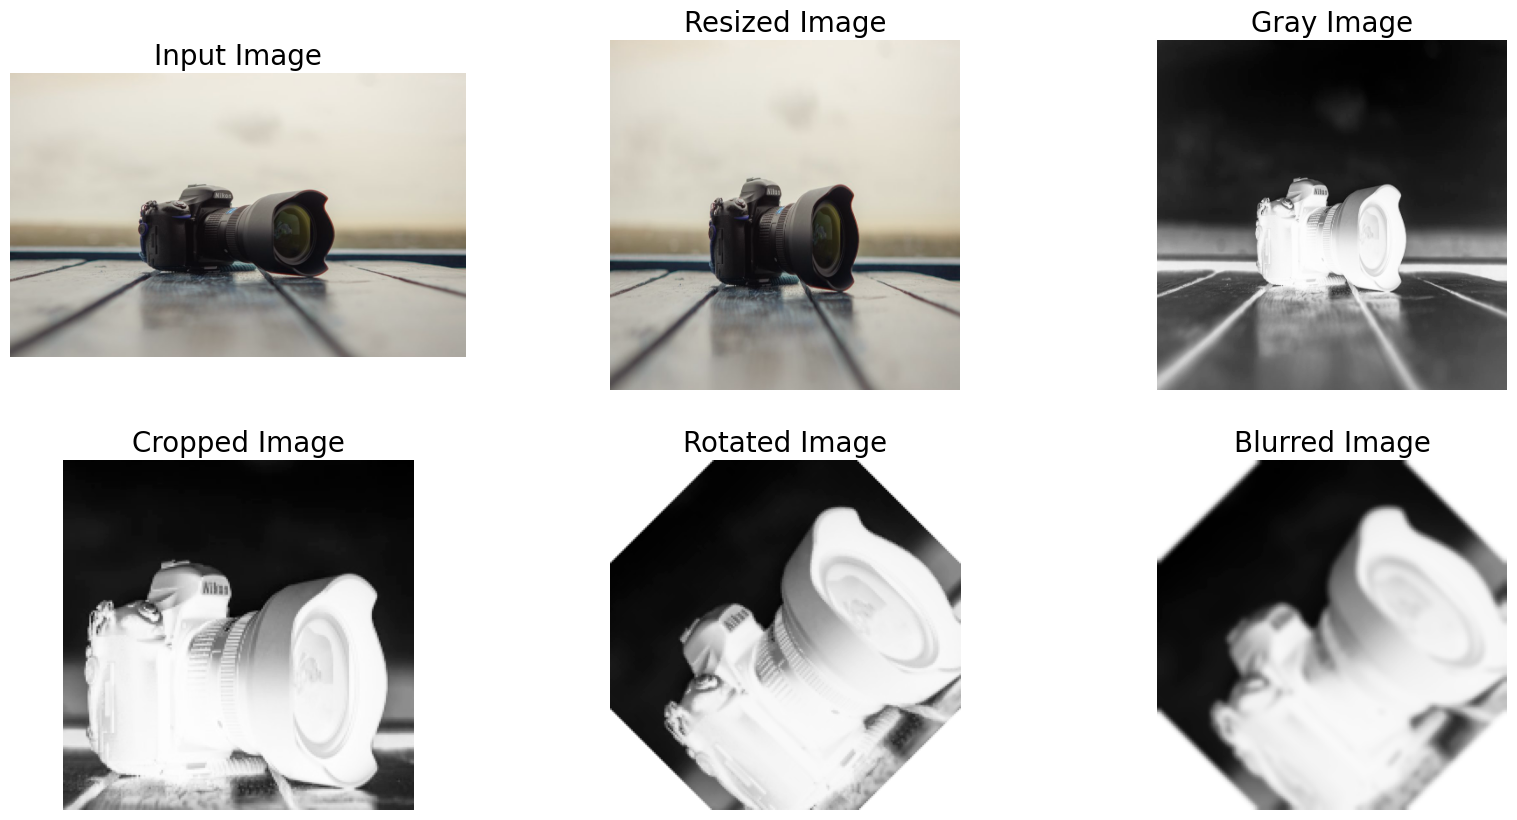

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(231),plt.imshow(input_image),plt.axis('off'),plt.title('Input Image',size=20)
plt.subplot(232),plt.imshow(resized_image),plt.axis('off'),plt.title('Resized Image',size=20)
plt.subplot(233),plt.imshow(gray_image,cmap='Greys'),plt.axis('off'),plt.title('Gray Image',size=20)
plt.subplot(234),plt.imshow(cropped_image,cmap='Greys'),plt.axis('off'),plt.title('Cropped Image',size=20)
plt.subplot(235),plt.imshow(rotated_image,cmap='Greys'),plt.axis('off'),plt.title('Rotated Image',size=20)
plt.subplot(236),plt.imshow(blurred_image,cmap='Greys'),plt.axis('off'),plt.title('Blurred Image',size=20)


In [13]:
import numpy as np
#create a canvas to combine all images
canvas = np.zeros((800,800,3),dtype=np.uint8)
#place img on the canvas
canvas[0:400,0:400] = resized_image
canvas[0:200,400:600] = cv.cvtColor(cropped_image,cv.COLOR_GRAY2BGR)
canvas[200:400,400:600] = cv.cvtColor(rotated_image,cv.COLOR_GRAY2BGR)
canvas[400:600,400:600] = cv.cvtColor(blurred_image,cv.COLOR_GRAY2BGR)
cv.imwrite('Output_image.jpg',canvas)

print("Output image saved successfully")

Output image saved successfully
